<a href="https://colab.research.google.com/github/BharatiChaudhury/Fractional-Cover-of-Green-canopy-soil-and-shadow-/blob/main/ColorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is the implementation of the paper https://ieeexplore.ieee.org/document/8441141 for percentage cover detection of soil,shadow, green canopy and crop residue

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd
%cd "drive/My Drive/gtdata"
!pwd





/content/drive/My Drive/gtdata
[Errno 2] No such file or directory: 'drive/My Drive/gtdata'
/content/drive/My Drive/gtdata
/content/drive/My Drive/gtdata


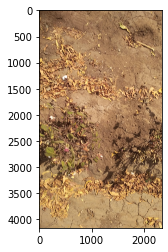

Percentages of colors in image  IMG_20180329_105920.jpg :
Pink color % =  0.0
Purple color % =  0.0
Red color % =  0.0
Orange color % =  0.0
Yellow color % =  0.0
Green color % =  0.1424
Cyan color % =  0.0992
Blue color % =  94.7584
Brown color % =  0.0
White color % =  0.0
Grey color % =  5.0
Black color % =  0.0



250000


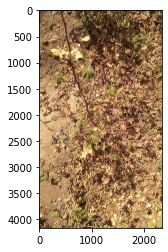

Percentages of colors in image  IMG_20180329_105954.jpg :
Pink color % =  0.0
Purple color % =  0.0004
Red color % =  0.0
Orange color % =  0.0
Yellow color % =  0.0
Green color % =  0.172
Cyan color % =  0.4908
Blue color % =  82.1744
Brown color % =  0.0
White color % =  0.0
Grey color % =  17.1624
Black color % =  0.0



250000


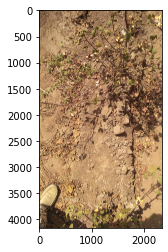

Percentages of colors in image  IMG_20180329_110027.jpg :
Pink color % =  0.0
Purple color % =  0.0
Red color % =  0.0
Orange color % =  0.0
Yellow color % =  0.0
Green color % =  0.0
Cyan color % =  0.1376
Blue color % =  90.7436
Brown color % =  0.0
White color % =  0.0
Grey color % =  9.1188
Black color % =  0.0



250000


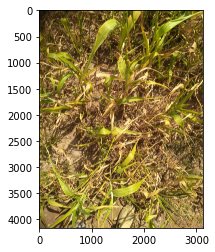

Percentages of colors in image  IMG_20180329_110109.jpg :
Pink color % =  0.0
Purple color % =  0.0
Red color % =  0.0
Orange color % =  0.0
Yellow color % =  0.0
Green color % =  3.4136
Cyan color % =  0.0064
Blue color % =  9.1608
Brown color % =  0.0
White color % =  0.0
Grey color % =  87.4192
Black color % =  0.0



250000


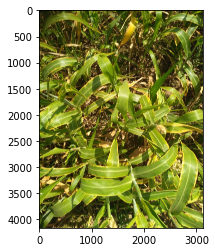

Percentages of colors in image  IMG_20180329_110139.jpg :
Pink color % =  0.0
Purple color % =  0.0
Red color % =  0.0
Orange color % =  0.0
Yellow color % =  0.0
Green color % =  60.7024
Cyan color % =  0.2684
Blue color % =  2.1252
Brown color % =  0.0
White color % =  0.0
Grey color % =  36.904
Black color % =  0.0



250000


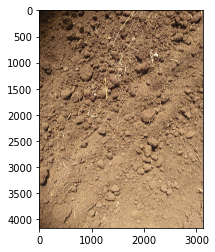

Percentages of colors in image  IMG_20180329_110458.jpg :
Pink color % =  0.0
Purple color % =  0.0
Red color % =  0.0
Orange color % =  0.0
Yellow color % =  0.0
Green color % =  0.0
Cyan color % =  0.0
Blue color % =  85.7656
Brown color % =  0.0
White color % =  0.0
Grey color % =  14.2344
Black color % =  0.0



250000


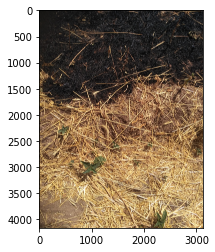

Percentages of colors in image  IMG_20180329_110640.jpg :
Pink color % =  0.0
Purple color % =  14.2296
Red color % =  0.0172
Orange color % =  0.0
Yellow color % =  0.0
Green color % =  0.5948
Cyan color % =  0.0
Blue color % =  15.5452
Brown color % =  0.0
White color % =  0.0
Grey color % =  59.7092
Black color % =  9.904



250000


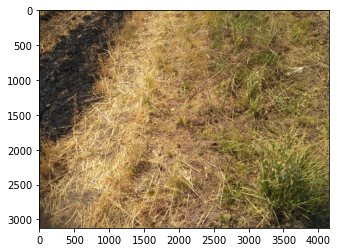

In [ ]:
import xlrd
import cv2
import os
import glob
import math
import time
import matplotlib.pyplot as plt

start_time = time.time()

img_dir = r"/content/drive/My Drive/gtdata" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []

def rgb_to_hsv(r, g, b): 
  
    # R, G, B values are divided by 255 
    # to change the range from 0..255 to 0..1: 
    r, g, b = r / 255.0, g / 255.0, b / 255.0
  
    # h, s, v = hue, saturation, value 
    cmax = max(r, g, b)    # maximum of r, g, b 
    cmin = min(r, g, b)    # minimum of r, g, b 
    diff = cmax-cmin       # diff of cmax and cmin. 
  
    # if cmax and cmax are equal then h = 0 
    if cmax == cmin:  
        h = 0
      
    # if cmax equal r then compute h 
    elif cmax == r:  
        h = (60 * ((g - b) / diff) + 360) % 360
  
    # if cmax equal g then compute h 
    elif cmax == g: 
        h = (60 * ((b - r) / diff) + 120) % 360
  
    # if cmax equal b then compute h 
    elif cmax == b: 
        h = (60 * ((r - g) / diff) + 240) % 360
  
    # if cmax equal zero 
    if cmax == 0: 
        s = 0
    else: 
        s = (diff / cmax) * 100
  
    # compute v 
    v = cmax * 100
    return h, s, v 

loc = r"/content/drive/My Drive/gtdata/traincolors.xlsx"

wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0) 
#sheet.cell_value(0, 0) 

for f1 in files:
    
    Pink_pixels = 0
    Purple_pixels = 0
    Red_pixels = 0
    Orange_pixels = 0
    Yellow_pixels = 0
    Green_pixels = 0
    Cyan_pixels = 0
    Blue_pixels = 0
    Brown_pixels = 0
    White_pixels = 0
    Grey_pixels = 0
    Black_pixels = 0
    
    #pixelcount = 0
    
    img = plt.imread(f1)
    plt.imshow(img)
    #cv2.waitKey(20000)
    #cv2.destroyAllWindows()
    plt.show()
    #print(img.shape)
    col,row,dim = img.shape
    
    for i in range(500):
        for j in range(500):
            hue = []
            mylist = []
            
            for k in range(sheet.nrows):
                mylist.append(sheet.row_values(k))
                r = mylist[k][1]
                g = mylist[k][2]
                b = mylist[k][3]
                h,s,v = rgb_to_hsv(r,g,b)
                hue.append(h)
            
            #print(min(hue),max(hue))
            
            r = float(img[j][i][2])
            g = float(img[j][i][1])
            b = float(img[j][i][0])
            #cv2.imread reads the values in bgr format
            mindist = 10000
            
            h,s,v = rgb_to_hsv(r,g,b)
            
            hue.append(h)
            
            hmin,hmax = min(hue),max(hue)
            
            for k,v in  enumerate(hue):
                hue[k] = (v-hmin)/(hmax-hmin)
                hue[k] = hue[k]*10
                #multiplying with 10 brings ranges to 0-1,1-2 etc and it will be easy to find the colors in bin using integer part
                if int(hue[k]) == 10:
                    hue[k] = 9.0
                #value of 1 is included in the last bin
            for k in range(len(mylist)): #all training examples
                if int(hue[k]) == int(hue[-1]): #hue[-1] means the testing data
                    dist = math.sqrt((mylist[k][1] - r)**2 + (mylist[k][2] - g)**2 + (mylist[k][3] - b)**2)
                    
                    if dist < mindist:
                        mindist = dist
                        colorname = mylist[k][4]
            
            
            
            if colorname == 'Pink':
                Pink_pixels = Pink_pixels+1
            elif colorname == 'Purple':
                Purple_pixels = Purple_pixels+1
            elif colorname == 'Red':
                Red_pixels = Red_pixels+1
            elif colorname == 'Orange':
                Orange_pixels = Orange_pixels+1
            elif colorname == 'Yellow':
                Yellow_pixels = Yellow_pixels+1
            elif colorname == 'Green':
                Green_pixels = Green_pixels+1
            elif colorname == 'Cyan':
                Cyan_pixels = Cyan_pixels+1
            elif colorname == 'Blue':
                Blue_pixels = Blue_pixels+1
            elif colorname == 'Brown':
                Brown_pixels = Brown_pixels+1
            elif colorname == 'White':
                White_pixels = White_pixels+1
            elif colorname == 'Grey':
                Grey_pixels = Grey_pixels+1
            else: #the remaining color is Black
                Black_pixels = Black_pixels+1
    
    print("Percentages of colors in image ",os.path.split(f1)[-1],":")
    print("Pink color % = ",Pink_pixels/2500.0)
    print("Purple color % = ",Purple_pixels/2500.0)
    print("Red color % = ",Red_pixels/2500.0)
    print("Orange color % = ",Orange_pixels/2500.0)
    print("Yellow color % = ",Yellow_pixels/2500.0)
    print("Green color % = ",Green_pixels/2500.0)
    print("Cyan color % = ",Cyan_pixels/2500.0)
    print("Blue color % = ",Blue_pixels/2500.0)
    print("Brown color % = ",Brown_pixels/2500.0)
    print("White color % = ",White_pixels/2500.0)
    print("Grey color % = ",Grey_pixels/2500.0)
    print("Black color % = ",Black_pixels/2500.0)
    print("\n\n")

    pixelcount = Pink_pixels + Purple_pixels + Red_pixels + Orange_pixels + Yellow_pixels + Green_pixels + Cyan_pixels + Blue_pixels + Brown_pixels + White_pixels + Grey_pixels + Black_pixels
    
    print(pixelcount)
            
print("--- %s seconds ---" % (time.time() - start_time))    a